Accuracy: 99.90%

Enter Student details to calculate dropout probability:
School Type: Private
Location: Rural
Gender: Female
Caste: General
Age: 13
Standard: 6
Socioeconomic Status: Low
Estimated dropout probability: 61.00%


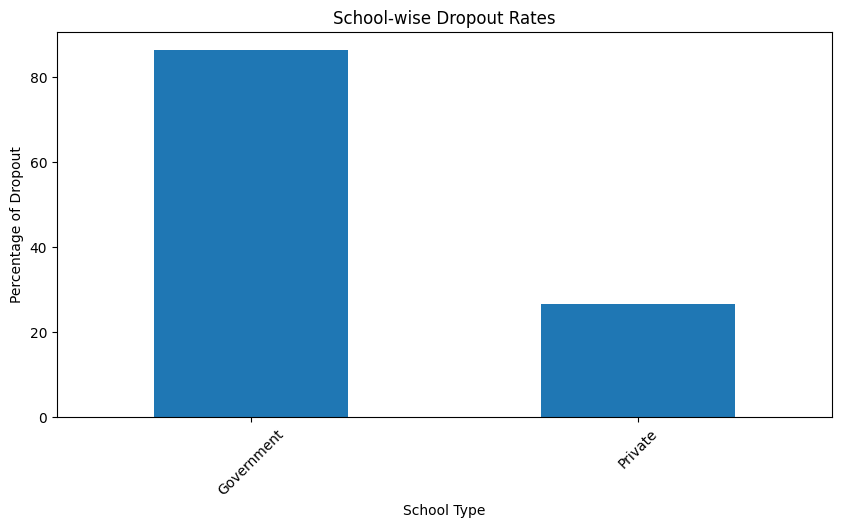

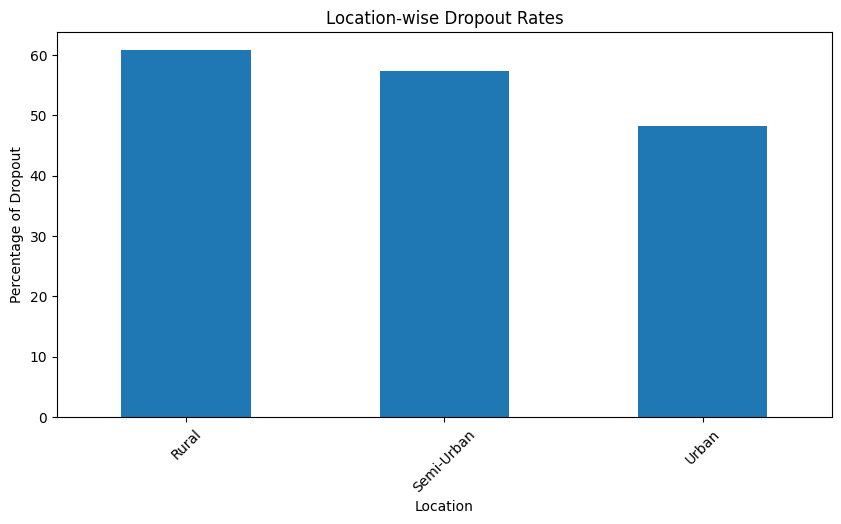

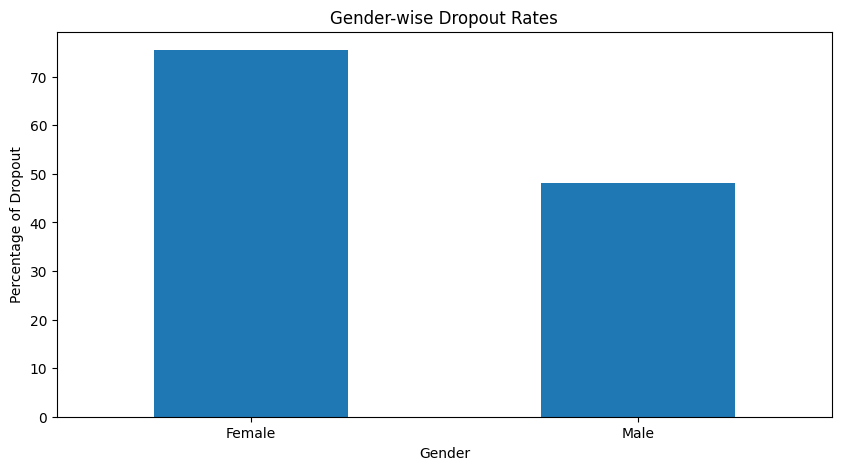

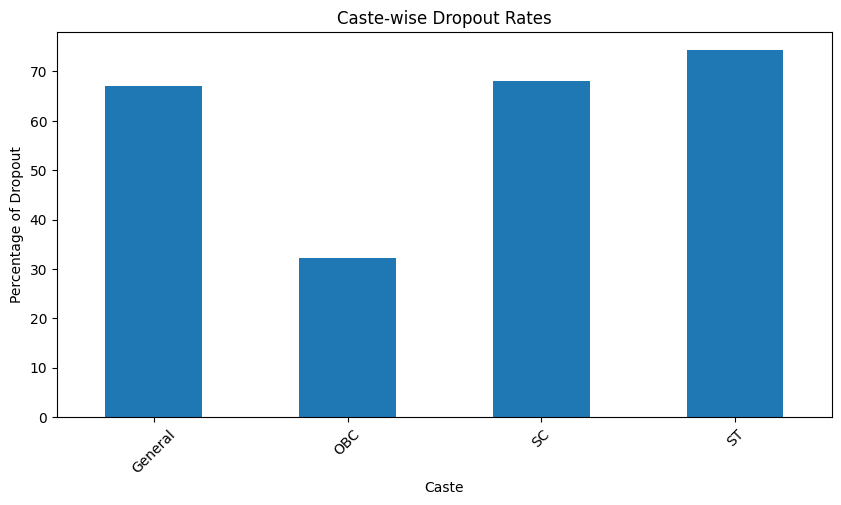

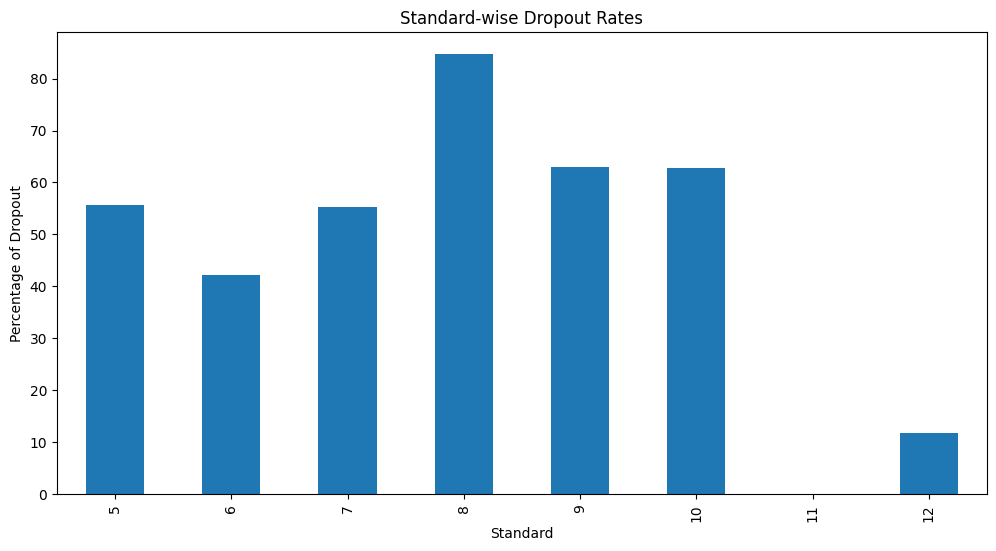

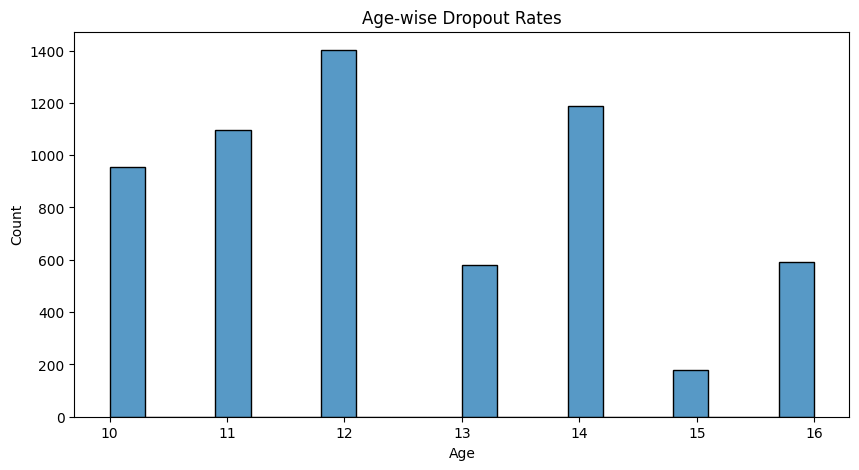

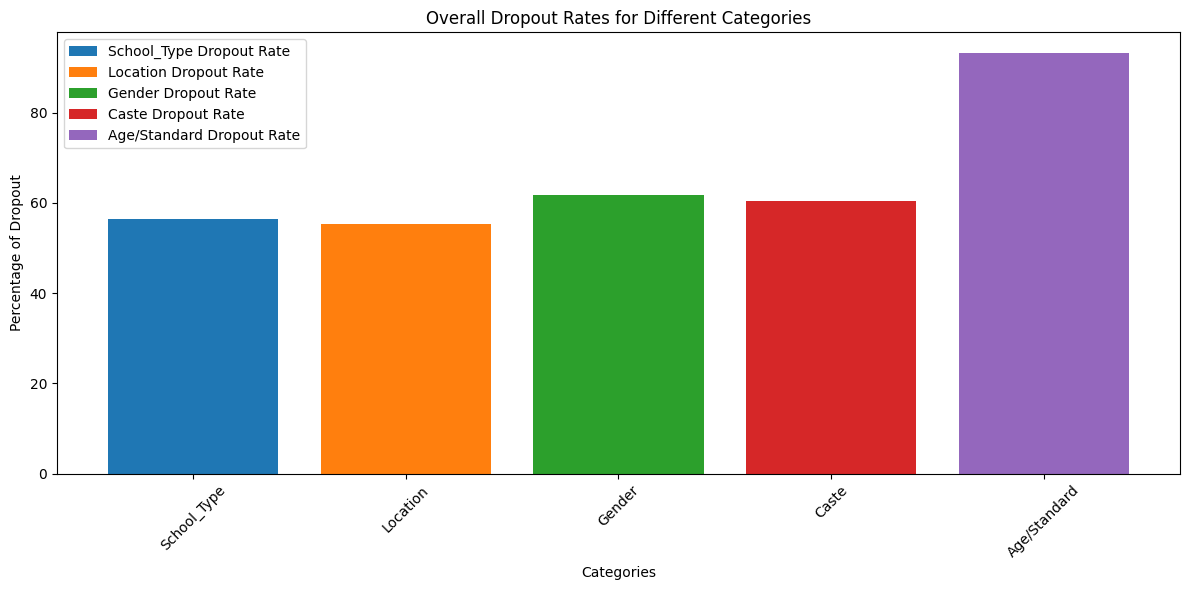

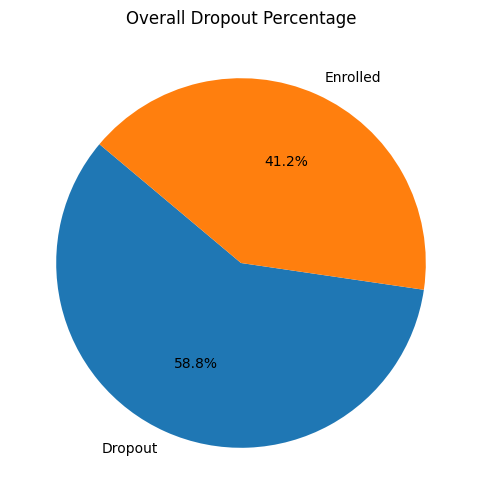

In [ ]:
import pandas as pd
from sklearn.model_selection import train_test_split
from sklearn.ensemble import RandomForestClassifier
from sklearn.metrics import accuracy_score
from sklearn.preprocessing import LabelEncoder
data = pd.read_csv('SIH-Dataset.csv')

data = data.drop(columns=["Dropout_Reason"], axis=1)
data.head()

# Encode the target variable 'Dropout_Status' to 0 or 1
le = LabelEncoder()
data['Dropout_Status'] = le.fit_transform(data['Dropout_Status'])

# Select categorical columns (all columns except 'Dropout_Status')
categorical_cols = data.columns.drop('Dropout_Status')
categorical_cols

# Apply one-hot encoding to categorical columns
data = pd.get_dummies(data, columns=categorical_cols, drop_first=True)

X = data.drop('Dropout_Status', axis=1)
y = data['Dropout_Status']

# Split the data into training and testing sets (80% training, 20% testing)
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

# Build and train a Random Forest Classifier
model = RandomForestClassifier(random_state=42)
model.fit(X_train, y_train)

# Make predictions on the testing data
y_pred = model.predict(X_test)

# Calculate accuracy
accuracy = accuracy_score(y_test, y_pred)
print(f'Accuracy: {accuracy * 100:.2f}%')
# Input student details to calculate dropout probability
print("\nEnter Student details to calculate dropout probability:")
school_type= input("School Type: ")
location = input("Location: ")
gender = input("Gender: ")
caste = input("Caste: ")
age = int(input("Age: "))
standard = input("Standard: ")
socioeconomic_status = input("Socioeconomic Status: ")

# Create a DataFrame for the input data with all categorical columns
input_data = pd.DataFrame({'School_Type':[school_type],'Location': [location], 'Gender': [gender],
                           'Caste': [caste], 'Age': [age], 'Standard': [standard],
                           'Socioeconomic_Status': [socioeconomic_status]})

# Apply one-hot encoding to the input data
input_data = pd.get_dummies(input_data, columns=['School_Type','Location', 'Gender', 'Caste', 'Age','Standard', 'Socioeconomic_Status'], drop_first=True)

# Ensure that input data columns match the model's columns in the correct order
missing_columns = list(set(X.columns) - set(input_data.columns))
input_data = input_data.reindex(columns=X.columns, fill_value=0)

# Predict dropout probability
dropout_probability = model.predict_proba(input_data)[0][1] * 100

print(f"Estimated dropout probability: {dropout_probability:.2f}%")

import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns

# Load the dataset
dataset_path = "SIH-Dataset.csv"
data = pd.read_csv(dataset_path)

# Filter the dataset to consider only "Dropout" in the "Dropout_Status" column
dropout_data = data[data['Dropout_Status'] == 'Dropout']

# Calculate dropout percentages based on Dropout_Status
dropout_percentage = (len(dropout_data) / len(data)) * 100

# School-wise dropout analysis
school_dropout = dropout_data.groupby('School_Type')['Dropout_Status'].count() / data.groupby('School_Type')['Dropout_Status'].count() * 100
school_dropout.plot(kind='bar', figsize=(10, 5))
plt.title('School-wise Dropout Rates')
plt.xlabel('School Type')
plt.ylabel('Percentage of Dropout')
plt.xticks(rotation=45)
plt.show()

# Location-wise dropout analysis
location_dropout = dropout_data.groupby('Location')['Dropout_Status'].count() / data.groupby('Location')['Dropout_Status'].count() * 100
location_dropout.plot(kind='bar', figsize=(10, 5))
plt.title('Location-wise Dropout Rates')
plt.xlabel('Location')
plt.ylabel('Percentage of Dropout')
plt.xticks(rotation=45)
plt.show()

# Gender-wise dropout analysis
gender_dropout = dropout_data.groupby('Gender')['Dropout_Status'].count() / data.groupby('Gender')['Dropout_Status'].count() * 100
gender_dropout.plot(kind='bar', figsize=(10, 5))
plt.title('Gender-wise Dropout Rates')
plt.xlabel('Gender')
plt.ylabel('Percentage of Dropout')
plt.xticks(rotation=0)
plt.show()

# Caste-wise dropout analysis
caste_dropout = dropout_data.groupby('Caste')['Dropout_Status'].count() / data.groupby('Caste')['Dropout_Status'].count() * 100
caste_dropout.plot(kind='bar', figsize=(10, 5))
plt.title('Caste-wise Dropout Rates')
plt.xlabel('Caste')
plt.ylabel('Percentage of Dropout')
plt.xticks(rotation=45)
plt.show()

# Standard-wise dropout analysis
standard_dropout = dropout_data.groupby('Standard')['Dropout_Status'].count() / data.groupby('Standard')['Dropout_Status'].count() * 100
standard_dropout.plot(kind='bar', figsize=(12, 6))
plt.title('Standard-wise Dropout Rates')
plt.xlabel('Standard')
plt.ylabel('Percentage of Dropout')
plt.xticks(rotation=90)
plt.show()

# Age-wise dropout analysis (Histogram)
plt.figure(figsize=(10, 5))
sns.histplot(data=dropout_data, x='Age', bins=20)
plt.title('Age-wise Dropout Rates')
plt.xlabel('Age')
plt.ylabel('Count')
plt.show()


# Load the dataset
dataset_path = "SIH-Dataset.csv"
data = pd.read_csv(dataset_path)

# Filter the dataset to consider only "Dropout" in the "Dropout_Status" column
dropout_data = data[data['Dropout_Status'] == 'Dropout']

# Calculate dropout percentages based on Dropout_Status
dropout_percentage = (len(dropout_data) / len(data)) * 100

# Calculate dropout rates for all categories
dropout_rates = []

# School-wise dropout rate
school_dropout_rate = dropout_data.groupby('School_Type')['Dropout_Status'].count() / data.groupby('School_Type')['Dropout_Status'].count() * 100
dropout_rates.append(school_dropout_rate)

# Location-wise dropout rate
location_dropout_rate = dropout_data.groupby('Location')['Dropout_Status'].count() / data.groupby('Location')['Dropout_Status'].count() * 100
dropout_rates.append(location_dropout_rate)

# Gender-wise dropout rate
gender_dropout_rate = dropout_data.groupby('Gender')['Dropout_Status'].count() / data.groupby('Gender')['Dropout_Status'].count() * 100
dropout_rates.append(gender_dropout_rate)

# Caste-wise dropout rate
caste_dropout_rate = dropout_data.groupby('Caste')['Dropout_Status'].count() / data.groupby('Caste')['Dropout_Status'].count() * 100
dropout_rates.append(caste_dropout_rate)

# Age/standard-wise dropout rate
age_standard_dropout_rate = dropout_data.groupby(['Age', 'Standard'])['Dropout_Status'].count() / data.groupby(['Age', 'Standard'])['Dropout_Status'].count() * 100
dropout_rates.append(age_standard_dropout_rate.unstack())

# Create a bar graph for all columns
plt.figure(figsize=(12, 6))
for i, category in enumerate(['School_Type', 'Location', 'Gender', 'Caste', 'Age/Standard']):
    plt.bar(category, dropout_rates[i].mean(), label=f'{category} Dropout Rate')

plt.xlabel('Categories')
plt.ylabel('Percentage of Dropout')
plt.title('Overall Dropout Rates for Different Categories')
plt.legend()
plt.xticks(rotation=45)
plt.tight_layout()
plt.show()

# Pie chart for overall dropout percentage
plt.figure(figsize=(6, 6))
labels = ['Dropout', 'Enrolled']
sizes = [dropout_percentage, 100 - dropout_percentage]
plt.pie(sizes, labels=labels, autopct='%1.1f%%', startangle=140)
plt.title('Overall Dropout Percentage')
plt.show()


In [ ]:
# Get feature importances
feature_importances = model.feature_importances_

# Create a DataFrame to associate feature names with their importance scores
feature_importance_df = pd.DataFrame({'Feature': X.columns, 'Importance': feature_importances})

# Sort features by importance
feature_importance_df = feature_importance_df.sort_values(by='Importance', ascending=False)

# Select the top N most important features
top_features = feature_importance_df.head()['Feature'].tolist()

# Use only the top features for training and testing
X_train_selected = X_train[top_features]
X_test_selected = X_test[top_features]
top_features
X_train_selected


,Socioeconomic_Status_Low,School_Type_Private,Caste_OBC,Teaching_Staff_Poor,Age_15
8161,0,0,0,0,0
8696,1,1,0,1,0
6044,1,0,1,1,0
5419,1,0,0,0,0
4196,0,1,1,0,0
...,...,...,...,...,...
5734,1,0,0,0,0
5191,1,0,0,0,0
5390,1,0,0,1,0
860,1,0,0,1,0
